<a href="https://colab.research.google.com/github/AlexeyTimoshin/Statistics/blob/main/hard_ml_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
titlesize = 24
labelsize = 22
legendsize = 22
xticksize = 18
yticksize = 18

plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.4
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = labelsize
plt.rcParams['axes.titlesize'] = titlesize
plt.rcParams['figure.figsize'] = (10, 6)

plt.rc('xtick', labelsize=xticksize)
plt.rc('ytick', labelsize=yticksize)
plt.rc('legend', fontsize=legendsize)

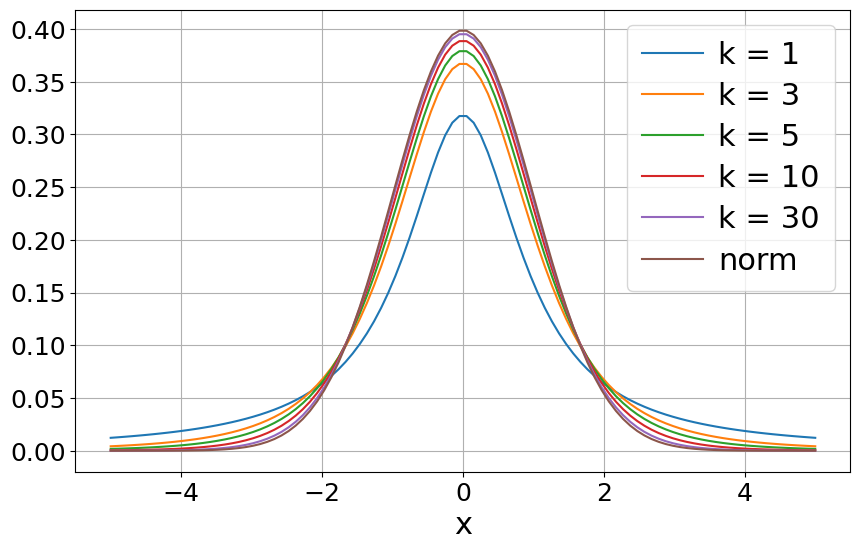

In [ ]:
# Построим график распределения Стюдента

X = np.linspace(5,-5, 100)

list_k = [1, 3, 5, 10, 30]

for k in list_k:
    Y = stats.t.pdf(X, k)
    plt.plot(X, Y, label=f'k = {k}')

Y = stats.norm.pdf(X, 0, 1)
plt.plot(X, Y, label='norm')
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

Есть две выборки: $X_1,\ldots,X_{n_1}\sim N(\mu_1, \sigma_1)$ и $Y_1,\ldots,Y_{n_2}\sim N(\mu_2, \sigma_2)$.
    
Гипотезы: $H_0: \mathbb{E}{X} = \mathbb{E}{Y}$ и $H_1: \mathbb{E}{X} \neq \mathbb{E}{Y}$.

Статистика теста
$$t(X^n, Y^n) = \dfrac{\overline{Y} - \overline{X}}{\sqrt{\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}}} \approx St(\nu), \qquad \nu = \frac{\left(\dfrac{S^2_X}{n_1} + \dfrac{S^2_Y}{n_2}\right)^2}{\dfrac{S_X^4}{n_1^2 (n_1 - 1)} + \dfrac{S_Y^4}{n_2^2 (n_2 - 1)}}$$

In [ ]:
# Реализуем вычисление статистики теста

def get_student_parametr(data_one: np.array, data_two: np.array) -> float:
    '''Вычисляет параметр функции распределения Стьюдента'''
    len_one, len_two = len(data_one), len(data_two)
    mean_one, mean_two = np.mean(data_one), np.mean(data_two)
    std_one, std_two = np.std(data_one), np.std(data_two)

    parametr = (
        ((std_one**2) / len_one + (std_two**2)/len_two)**2
        /
        (
            (std_one**4) / ((len_one**2) * (len_one-1))
            +
            (std_two**4) / ((len_two**2) * (len_two-1))
        )
    )
    return parametr


def get_ttes_statistic(data_one: np.array, data_two: np.array) -> float:
    '''Вычисляет статистику Стьюдента'''
    len_one, len_two = len(data_one), len(data_two)
    mean_one, mean_two = np.mean(data_one), np.mean(data_two)
    std_one, std_two =  np.std(data_one, ddof=1), np.std(data_two, ddof=1)
    stat = (mean_two-mean_one) / np.sqrt((std_one**2 / len_one) + (std_two**2 / len_two))
    return stat

In [ ]:
# Создадим примеры
np.random.seed(44)
sample_size = 100
data_control = -np.random.normal(1, 1, sample_size)
data_test = -np.random.normal(1.2, 1, sample_size)

k = get_student_parametr(data_control, data_test)
print(f"Student parametr = {k}")

alpha = 0.05
critical_region_bounds = stats.t.ppf([alpha/2, 1 - alpha/2], df=k) ## !!!!!
print(f"Critical region bounds = {critical_region_bounds}")

ttest = get_ttes_statistic(data_control, data_test)
print(f"Ttest statistics = {ttest}")

p_value = stats.t.cdf(-np.abs(ttest), df=k)*2
print(f"P value = {p_value}")

# Сверим с готовой реализацией
Tstats = stats.ttest_ind(data_control, data_test)
print(f"Ttest from stats = {Tstats}")


Student parametr = 196.53643393447297
Critical region bounds = [-1.97210778  1.97210778]
Ttest statistics = -1.8203056424009751
P value = 0.0702335577441075
Ttest from stats = TtestResult(statistic=1.8203056424009751, pvalue=0.07022230781028711, df=198.0)


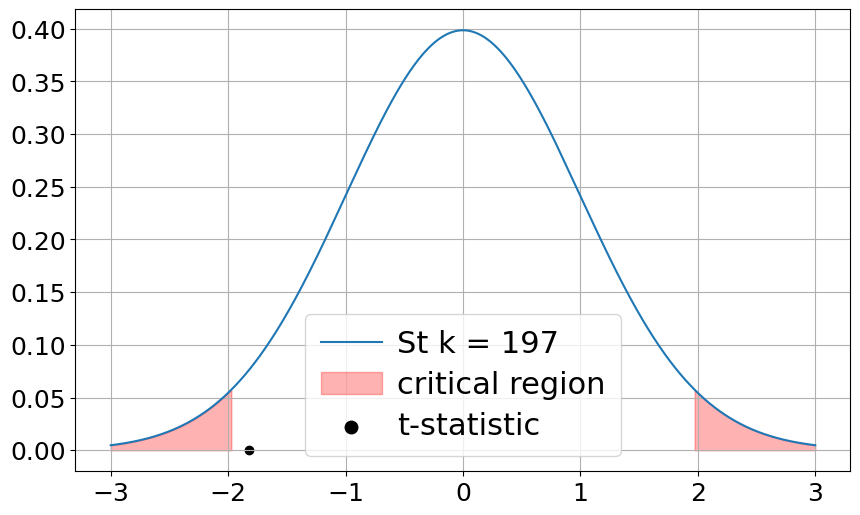

In [ ]:
# Визуализация

X = np.linspace(3, -3, 1000) #!!!!!!!!
Y = stats.t.pdf(X, k)

plt.plot(X, Y, label=f'St k = {k:0.0f}') #!!!!!!!!!

# Критические зоны
critical_zone = [X < critical_region_bounds[0], X > critical_region_bounds[1]]
for idx, mask in enumerate(critical_zone):
    X_ = X[mask]
    Y_up = Y[mask]
    Y_dw = np.zeros(len(Y_up))
    plt.fill_between(
        X_, Y_dw, Y_up,
        color='r', alpha=0.3,
        label='critical region' if idx==0 else ''
    )
plt.scatter([ttest], [0], color='k', label='t-statistic')
plt.legend()
plt.grid()
plt.show()

array([-1.97210778,  1.97210778])